# 项目：用逻辑回归预测泰坦尼克号幸存情况

## 分析目标

此数据分析报告的目的是，基于泰坦尼克号乘客的性别和船舱等级等属性，对幸存情况进行逻辑回归分析，从而能利用得到的模型，对未知幸存情况的乘客，根据属性预测是否从沉船事件中幸存。

## 简介

> 泰坦尼克号（英语：RMS Titanic）是一艘奥林匹克级邮轮，于1912年4月首航时撞上冰山后沉没。泰坦尼克号是同级的3艘超级邮轮中的第2艘，与姐妹船奥林匹克号和不列颠号为白星航运公司的乘客们提供大西洋旅行。

> 泰坦尼克号由位于北爱尔兰贝尔法斯特的哈兰·沃尔夫船厂兴建，是当时最大的客运轮船，由于其规模相当一艘现代航空母舰，因而号称“上帝也沉没不了的巨型邮轮”。在泰坦尼克号的首航中，从英国南安普敦出发，途经法国瑟堡-奥克特维尔以及爱尔兰昆士敦，计划横渡大西洋前往美国纽约市。但因为人为错误，于1912年4月14日船上时间夜里11点40分撞上冰山；2小时40分钟后，即4月15日凌晨02点20分，船裂成两半后沉入大西洋，死亡人数超越1500人，堪称20世纪最大的海难事件，同时也是最广为人知的海难之一。

数据集包括两个数据表：`titianic_train.csv`和`titanic_test.csv`。

`titianic_train.csv`记录了超过八百位泰坦尼克号乘客在沉船事件后的幸存情况，以及乘客的相关信息，包括所在船舱等级、性别、年龄、同乘伴侣/同胞数量、同乘父母/孩子数量，等等。

`titanic_test.csv`只包含乘客（这些乘客不在`titianic_train.csv`里）相关信息，此文件可以被用于预测乘客是否幸存。

`titianic_train.csv`每列的含义如下：
- PassengerId：乘客ID
- survival：是否幸存
   - 0	否
   - 1	是
- pclass：船舱等级
   - 1	一等舱
   - 2	二等舱
   - 3  三等舱
- sex：性别
- Age：年龄
- sibsp：同乘伴侣/同胞数量
- parch：同乘父母/孩子数量
- ticket：船票号
- fare：票价金额
- cabin：船舱号
- embarked：登船港口
   - C  瑟堡
   - Q  皇后镇
   - S  南安普敦
   
   
`titianic_test.csv`每列的含义和上面相同，但不具备survival变量的数据，即是否幸存。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import ztest
import statsmodels.api as sm

In [2]:
origin_data = pd.read_csv("titanic_train.csv")
origin_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
origin_data.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
465,466,0,3,"Goncalves, Mr. Manuel Estanslas",male,38.00,0,0,SOTON/O.Q. 3101306,7.0500,NaN,S
657,658,0,3,"Bourke, Mrs. John (Catherine)",female,32.00,1,1,364849,15.5000,NaN,Q
267,268,1,3,"Persson, Mr. Ernst Ulrik",male,25.00,1,0,347083,7.7750,NaN,S
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.00,0,0,C.A. 18723,10.5000,NaN,S
627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.00,0,0,13502,77.9583,D9,S
779,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.00,0,1,24160,211.3375,B3,S
739,740,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
234,235,0,2,"Leyson, Mr. Robert William Norman",male,24.00,0,0,C.A. 29566,10.5000,NaN,S
314,315,0,2,"Hart, Mr. Benjamin",male,43.00,1,1,F.C.C. 13529,26.2500,NaN,S
650,651,0,3,"Mitkoff, Mr. Mito",male,NaN,0,0,349221,7.8958,NaN,S


### 评估和清理

乍一看是符合三点的，再看看具体的信息

In [4]:
origin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age,Cabin,Embarked存在空值

并且需要给这里的某些变量转为category

Survived Pclass Sex Embarked需要转分类，而且PassengerId应该是字符串类型

In [5]:
origin_data["Embarked"].value_counts().index

Index(['S', 'C', 'Q'], dtype='object', name='Embarked')

In [6]:
origin_data["Survived"] = pd.Categorical(origin_data["Survived"],categories=[0,1])
origin_data["Pclass"] = pd.Categorical(origin_data["Pclass"],categories=[1,2,3])
origin_data["Sex"] = pd.Categorical(origin_data["Sex"],categories=["male","female"])
origin_data["Embarked"] = pd.Categorical(origin_data["Embarked"],categories=["S","C","Q"])

In [7]:
origin_data["PassengerId"] = origin_data["PassengerId"].astype(str)

In [8]:
origin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(2), object(4)
memory usage: 59.8+ KB


接下来是内容性问题，首先是空值

Age,Cabin,Embarked存在空值

In [9]:
origin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(2), object(4)
memory usage: 59.8+ KB


**注意了，在做逻辑回归也好，线性回归也好，在建立模型时要求数据集是没有空缺值的！！！一定要注意，因此在这里我们就把这些年龄的空缺值全部填上年龄的平均值**

In [10]:
origin_data[origin_data["Age"].isnull()]  #有足足177行阿，我咧个豆

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [11]:
average_age = origin_data["Age"].mean()
a = origin_data["Age"].fillna(average_age)  #fillna可以用在df也可以用在series，自动给空缺值填上某个数
print(a.isnull().sum())
origin_data["Age"] =a

0


In [12]:
origin_data[origin_data["Age"].isnull()] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [13]:
origin_data[origin_data["Cabin"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


有687条观察值的船舱号变量缺失，说明船舱号数据在大部分观察值中都是未知的，所以不能删除这些观察值。

**此外，我们认为船舱号并不是影响生还概率的关键因素，不会被纳入逻辑回归的自变量内，即使缺失也不会影响建立模型，因此可以保留这些观察值。**

In [14]:
origin_data[origin_data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


仅有两条观察值的登船港口变量缺失，但我们认为登船港口并不是影响生还概率的关键因素，不会被纳入逻辑回归的自变量内，即使缺失也不会影响建立模型，因此可以保留这些观察值。

**处理重复数据，理应应该是不存在的**

In [15]:
origin_data_quitid = origin_data.drop("PassengerId",axis=1)

In [16]:
origin_data_quitid

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [17]:
origin_data_quitid.duplicated().sum()

np.int64(0)

**处理不一致数据，理应应该是不存在的**

In [18]:
origin_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [19]:
passeng = origin_data["PassengerId"]
passeng = passeng.astype(int)
passeng.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: PassengerId
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [20]:
sum =0
for i in range(1,892):
    sum = sum+i
print(sum)

397386


In [21]:
sum2 = 0
for i in passeng:
    sum2 = sum2 + i
print(sum2)

397386


id不存在不合理或重复的id

In [22]:
origin_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [23]:
origin_data["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [24]:
origin_data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [25]:
origin_data.query("Age <= 0")  #没有不合理的年龄数值，而且我们也填补了空缺值

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [26]:
origin_data.query("SibSp < 0")  #有很多人都是没有同伴朋友的，不代表他们没有父母孩子啊

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [27]:
origin_data.query("SibSp == 0 & Parch ==0 ")   #你看，这些下面的537名乘客就是单独自己去，没有同伴朋友，也没用父母孩子一起去

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [28]:
origin_data.query("Parch < 0 ")  #合理

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [29]:
origin_data.query("Fare <= 0 ") #票价为负数的没有，但是免费的，花费0元票价的不少啊,有15个

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.699118,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,29.699118,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,29.699118,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.699118,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,29.699118,0,0,112052,0.0,NaN,S


In [30]:
origin_data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

**处理异常数据，处理异常其实我们上面也同时做了**

In [31]:
origin_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [32]:
origin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(2), object(4)
memory usage: 59.8+ KB


### 保存数据

In [33]:
data = origin_data.copy()

### 整理数据

对数据的整理，与分析方向紧密相关。此次数据分析目标是，根据泰坦尼克号乘客的相关信息，预测沉船事件发生后的生还概率。

数据变量包含乘客同乘伴侣/同胞数量，以及同乘父母/孩子数量，这些可以帮助计算出船上家庭成员的数量。我们对同乘家庭成员数量是否会显著影响幸存感兴趣，因此可以创建一个新的变量，记录这一数值。

In [34]:
data['FamilyNum'] = data['SibSp'] + data['Parch']
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,1


### 探索数据

In [35]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0


**看一下存活率有多少**

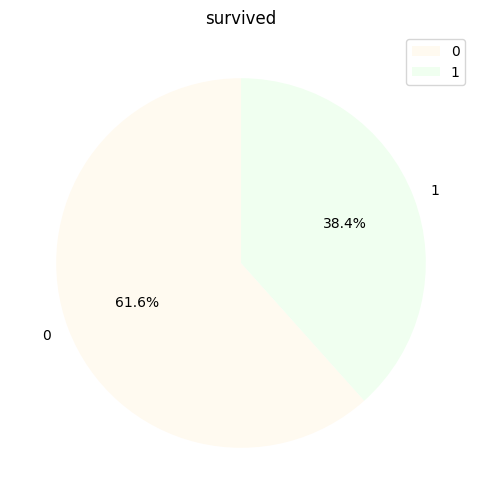

In [36]:
plt.figure(figsize=(8,6))
survived_counts = data["Survived"].value_counts()
plt.pie(
    survived_counts,
    labels = survived_counts.index,
    autopct = "%.1f%%",
    startangle=90,
    colors=["#FFFAF0","#F0FFF0"]
)
plt.legend()
plt.title("survived")
plt.show()

**可以看到，这群人中，存活的人只占不到百分之40，多数人是死亡的。**

**看下他们的舱位级别分布**

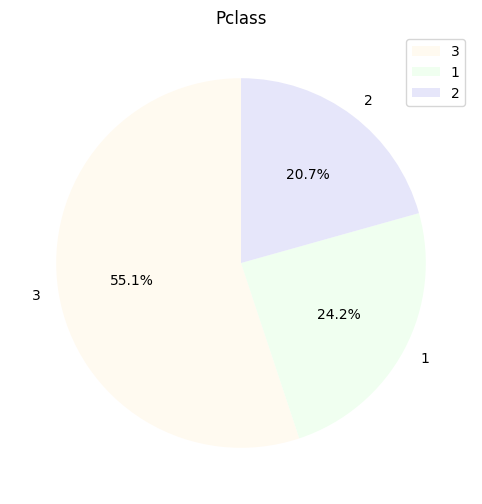

In [37]:
plt.figure(figsize=(8,6))
pclass_counts = data["Pclass"].value_counts()
plt.pie(
    pclass_counts,
    labels = pclass_counts.index,
    autopct = "%.1f%%",
    startangle=90,
    colors=["#FFFAF0","#F0FFF0","#E6E6FA"]
)
plt.legend()
plt.title("Pclass")
plt.show()

**可以看到，这群人中，3等舱的人超一半，其次才是一等舱和二等舱。**

**看下他们的性别分布**

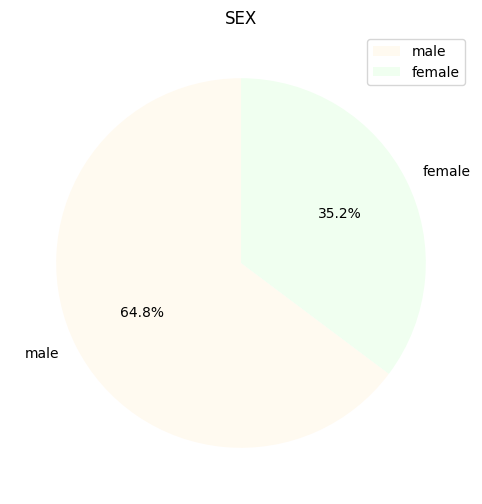

In [38]:
plt.figure(figsize=(8,6))
sex_counts = data["Sex"].value_counts()
plt.pie(
    sex_counts,
    labels = sex_counts.index,
    autopct = "%.1f%%",
    startangle=90,
    colors=["#FFFAF0","#F0FFF0","#E6E6FA"]
)
plt.legend()
plt.title("SEX")
plt.show()

**可以看到，这群人中，大多数是男士。**

**看下他们的年龄分布，这里我们要记得，平均数肯定是最多的，因为我们空值挺多的，全写平均值**

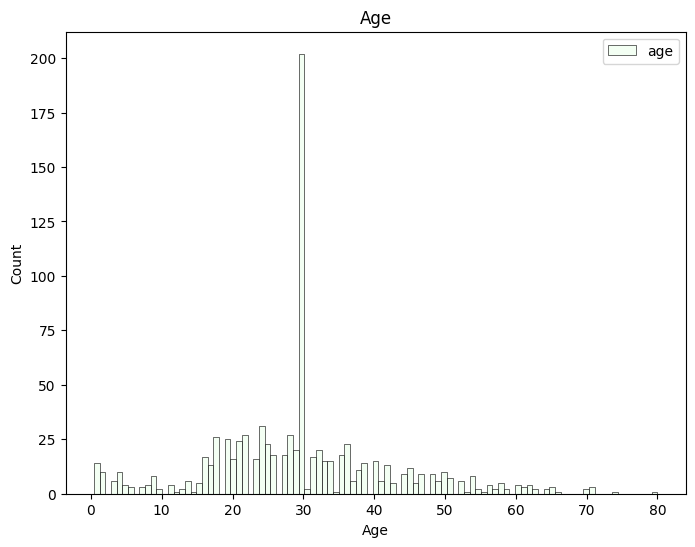

In [39]:
plt.figure(figsize=(8,6))
sex_counts = data["Sex"].value_counts()
sns.histplot(data,x="Age",binwidth=0.8,label="age",color="#F0FFF0")
plt.legend()
plt.title("Age")
plt.show()

**这群人中，年龄多介于20-40岁，平均值在30岁左右。也有极端的小孩和老人**

**看下他们的同伴情况**

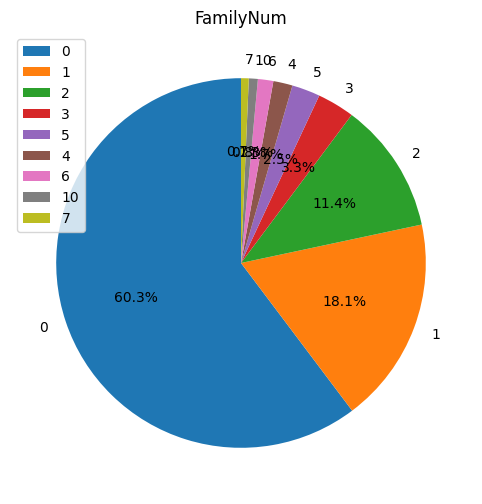

In [40]:
plt.figure(figsize=(8,6))
family_counts = data["FamilyNum"].value_counts()
plt.pie(
    family_counts,
    labels = family_counts.index,
    autopct = "%.1f%%",
    startangle=90,
)
plt.legend()
plt.title("FamilyNum")
plt.show()

**看下他们的票价**

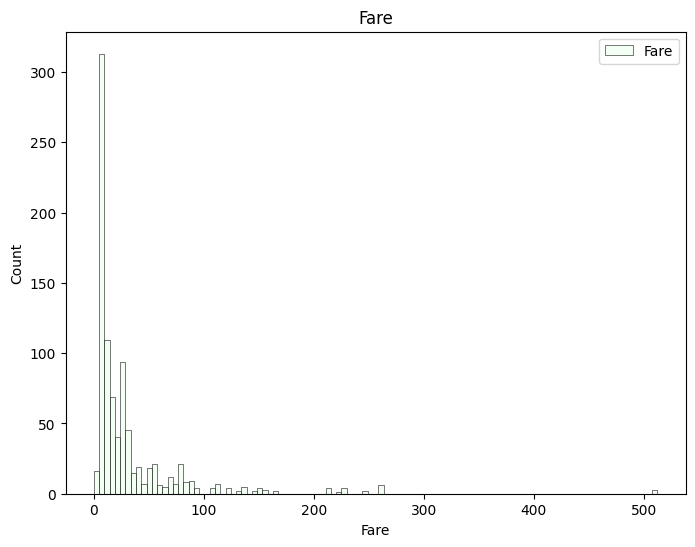

In [41]:
plt.figure(figsize=(8,6))
Fare_counts = data["Fare"].value_counts()
sns.histplot(data,x="Fare",label="Fare",color="#F0FFF0")
plt.legend()
plt.title("Fare")
plt.show()

**可以看到大部分票价位于0-100之间**

**看下他们的登船港口分布**

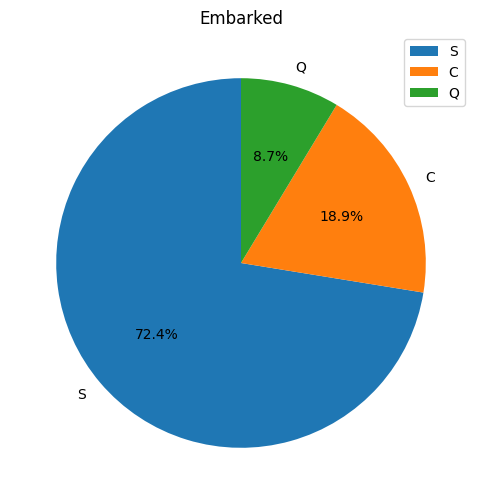

In [42]:
plt.figure(figsize=(8,6))
Emb_counts = data["Embarked"].value_counts()
plt.pie(
    Emb_counts,
    labels = Emb_counts.index,
    autopct = "%.1f%%",
    startangle=90,
)
plt.legend()
plt.title("Embarked")
plt.show()

**他们的登船港口主要集中在S**

In [43]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0


**看一下两两关系，和因变量的关系**

**舱位级别与存活率的关系**

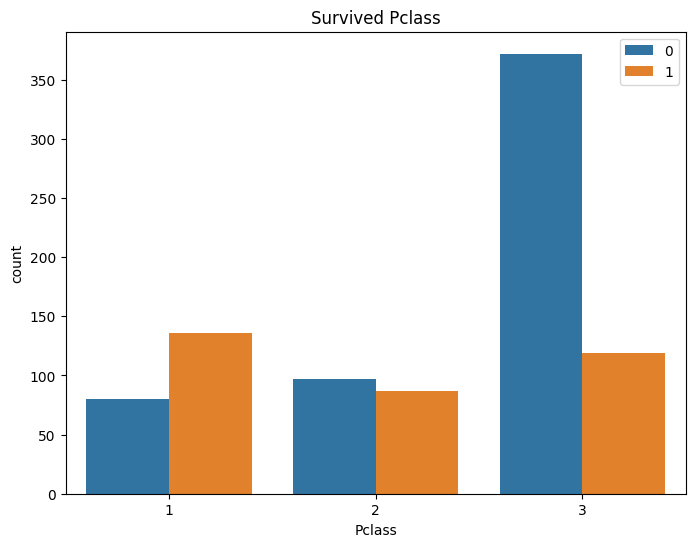

In [44]:
plt.figure(figsize=(8,6))
sns.countplot(data=data,x="Pclass",hue="Survived")
plt.legend()
plt.title("Survived Pclass")
plt.show()

**用计数图，x为舱位等级，然后分存活率，可以看到，因为三等舱的数量最多，所以死亡率也是最高的，死亡人数最多，一等舱虽然总人数不多，但是存活的人不少，单论每个舱的存活率来说，一等舱的存活率较高**

**性别与存活率的关系**

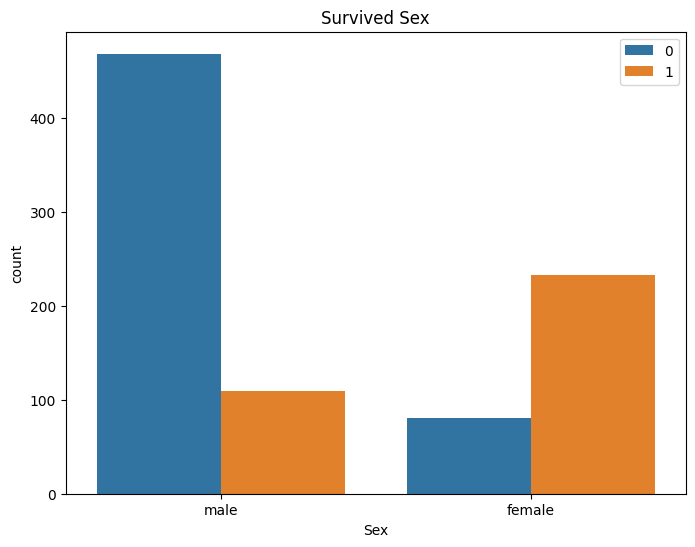

In [45]:
plt.figure(figsize=(8,6))
sns.countplot(data=data,x="Sex",hue="Survived")
plt.legend()
plt.title("Survived Sex")
plt.show()

**用计数图，x为性别，然后分存活率，可以看到，因为男人数量最多，所以死亡率也是最高的，死亡人数最多，男人中死亡率较高，而女人总数少，连存活率也高**

**年龄与存活率的关系**

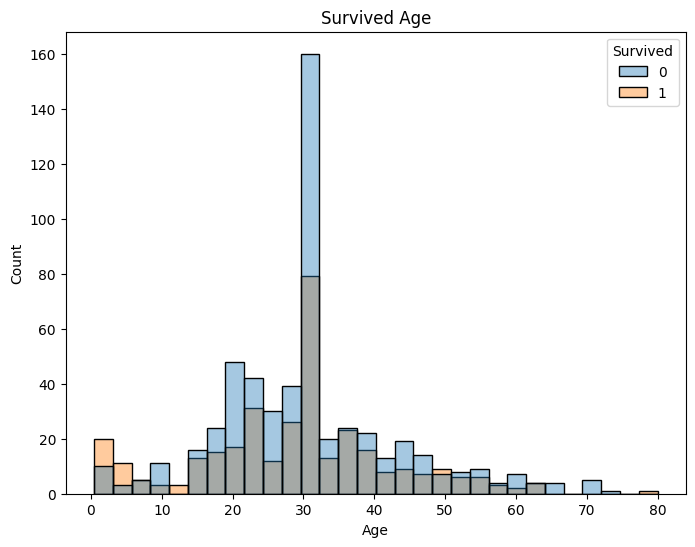

In [46]:
plt.figure(figsize=(8,6))
sns.histplot(data,x="Age",hue="Survived",color="#F0FFF0",alpha=0.4)  #alpha 不透明度
plt.title("Survived Age")
plt.show()

**先是对年龄进行计数统计，再用色调分类当中存活或者死亡的**

**同伴成员与存活率的关系**

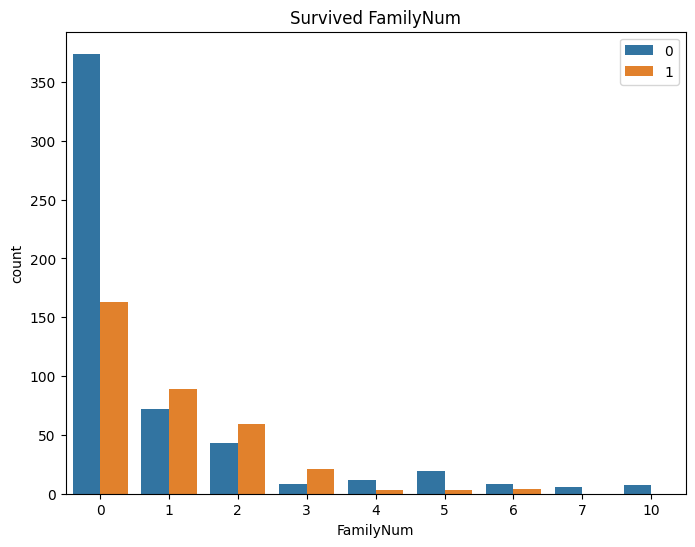

In [47]:
plt.figure(figsize=(8,6))
sns.countplot(data=data,x="FamilyNum",hue="Survived")
plt.legend()
plt.title("Survived FamilyNum")
plt.show()

从是否幸存与乘客家庭成员之间的柱状图来看，独身的乘客中遇难的多于幸存的。从有携带家庭成员的乘客来看，家庭成员在1～3位之间的幸存人数超过遇难人数，但同乘家庭成员超过3位后，遇难的更多。

**船票与存活率的关系**

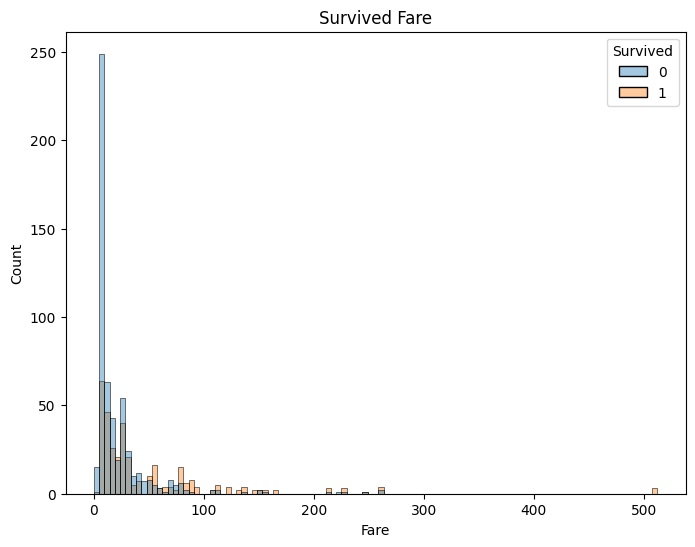

In [48]:
plt.figure(figsize=(8,6))
sns.histplot(data,x="Fare",hue="Survived",color="#F0FFF0",alpha=0.4)
plt.title("Survived Fare")
plt.show()

**船票的计数中，分两部分，存活与死亡**

**登船港口与存活率的关系**

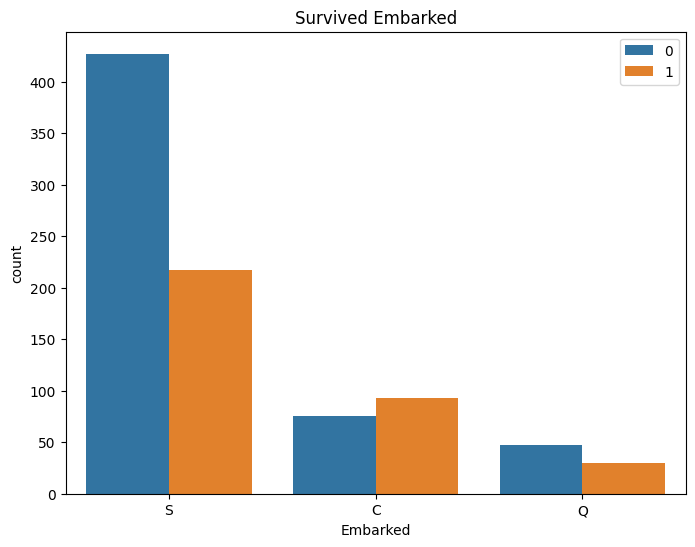

In [49]:
plt.figure(figsize=(8,6))
sns.countplot(data=data,x="Embarked",hue="Survived")
plt.legend()
plt.title("Survived Embarked")
plt.show()

**可以看到很多人在S港口登陆，因此这死亡率是最高的，C港口上的人居中，但是存活率是三个港口最高的**

### 分析数据

In [50]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0


In [51]:
data_train = data.copy()  #不影响源data

移除大概率不会有影响的变量

In [52]:
data_train = data_train.drop(["PassengerId","Name","Ticket","Cabin","Embarked"],axis=1)
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilyNum
0,0,3,male,22.000000,1,0,7.2500,1
1,1,1,female,38.000000,1,0,71.2833,1
2,1,3,female,26.000000,0,0,7.9250,0
3,1,1,female,35.000000,1,0,53.1000,1
4,0,3,male,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,0
887,1,1,female,19.000000,0,0,30.0000,0
888,0,3,female,29.699118,1,2,23.4500,3
889,1,1,male,26.000000,0,0,30.0000,0


In [53]:
data_train = pd.get_dummies(data_train,columns=["Pclass","Sex"],dtype=int,drop_first=True)

In [54]:
data_train

,Survived,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_female
0,0,22.000000,1,0,7.2500,1,0,1,0
1,1,38.000000,1,0,71.2833,1,0,0,1
2,1,26.000000,0,0,7.9250,0,0,1,1
3,1,35.000000,1,0,53.1000,1,0,0,1
4,0,35.000000,0,0,8.0500,0,0,1,0
...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,0,1,0,0
887,1,19.000000,0,0,30.0000,0,0,0,1
888,0,29.699118,1,2,23.4500,3,0,1,1
889,1,26.000000,0,0,30.0000,0,0,0,0


In [55]:
y=data_train["Survived"]
x=data_train.drop("Survived",axis=1)

In [56]:
x

,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_female
0,22.000000,1,0,7.2500,1,0,1,0
1,38.000000,1,0,71.2833,1,0,0,1
2,26.000000,0,0,7.9250,0,0,1,1
3,35.000000,1,0,53.1000,1,0,0,1
4,35.000000,0,0,8.0500,0,0,1,0
...,...,...,...,...,...,...,...,...
886,27.000000,0,0,13.0000,0,1,0,0
887,19.000000,0,0,30.0000,0,0,0,1
888,29.699118,1,2,23.4500,3,0,1,1
889,26.000000,0,0,30.0000,0,0,0,0


In [57]:
x.corr().abs() > 0.8

,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_female
Age,True,False,False,False,False,False,False,False
SibSp,False,True,False,False,True,False,False,False
Parch,False,False,True,False,False,False,False,False
Fare,False,False,False,True,False,False,False,False
FamilyNum,False,True,False,False,True,False,False,False
Pclass_2,False,False,False,False,False,True,False,False
Pclass_3,False,False,False,False,False,False,True,False
Sex_female,False,False,False,False,False,False,False,True


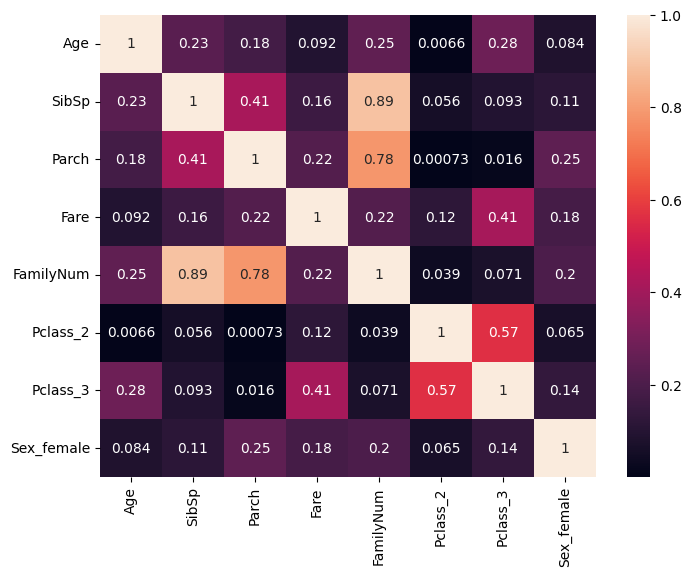

In [58]:
plt.figure(figsize=(8,6))
sns.heatmap(x.corr().abs(),annot=True)
plt.show()

**SibSp与FamilyNum高度相关，0.89，其实Parch跟FamilyNum也算高度了，0.78，因为本身famil这一列就是这两个series相加**

**所以其实本质famil这一列就是他们两个的和了，不用重复丢一样的数据了吧，而且0.78也算高度相关了，删掉这两个，保留family**

In [59]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: category
Categories (2, int64): [0, 1]

In [60]:
x = x.drop(["SibSp","Parch"],axis=1)

In [61]:
x

,Age,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_female
0,22.000000,7.2500,1,0,1,0
1,38.000000,71.2833,1,0,0,1
2,26.000000,7.9250,0,0,1,1
3,35.000000,53.1000,1,0,0,1
4,35.000000,8.0500,0,0,1,0
...,...,...,...,...,...,...
886,27.000000,13.0000,0,1,0,0
887,19.000000,30.0000,0,0,0,1
888,29.699118,23.4500,3,0,1,1
889,26.000000,30.0000,0,0,0,0


In [62]:
x = sm.add_constant(x)

In [63]:
x

,const,Age,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_female
0,1.0,22.000000,7.2500,1,0,1,0
1,1.0,38.000000,71.2833,1,0,0,1
2,1.0,26.000000,7.9250,0,0,1,1
3,1.0,35.000000,53.1000,1,0,0,1
4,1.0,35.000000,8.0500,0,0,1,0
...,...,...,...,...,...,...,...
886,1.0,27.000000,13.0000,0,1,0,0
887,1.0,19.000000,30.0000,0,0,0,1
888,1.0,29.699118,23.4500,3,0,1,1
889,1.0,26.000000,30.0000,0,0,0,0


In [64]:
model = sm.Logit(y,x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.443547
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Sat, 15 Mar 2025   Pseudo R-squ.:                  0.3339
Time:                        21:51:51   Log-Likelihood:                -395.20
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.786e-82
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0337      0.393      2.631      0.009       0.264       1.804
Age           -0.0388      0.008     -4.963      0.000      -0.054      -0.023
Fare           0.0032      0.002      1.311      0.190      -0.002       0.008
FamilyNum     -0.2430      0.068     -3.594      0.000      -0.376      -0.110
Pclass_2      -1.0003      0.293     -3.416      0.001      -1.574      -0.426
Pclass_3      -2.1324      0.289     -7.373      0.000      -2.699      -1.566
Sex_female     2.7759      0.199     13.980      0.000       2.387       3.165
==============================================================================
"""

票价其实也不会影响存货概率啊，而且p值确实大于0.05显著水平。说明对于预测没有一个显著的预测作用

In [65]:
x = x.drop("Fare",axis=1)
model = sm.Logit(y,x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.444623
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Sat, 15 Mar 2025   Pseudo R-squ.:                  0.3323
Time:                        21:51:51   Log-Likelihood:                -396.16
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.927e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2766      0.349      3.654      0.000       0.592       1.961
Age           -0.0395      0.008     -5.065      0.000      -0.055      -0.024
FamilyNum     -0.2186      0.065     -3.383      0.001      -0.345      -0.092
Pclass_2      -1.1798      0.261     -4.518      0.000      -1.692      -0.668
Pclass_3      -2.3458      0.242     -9.676      0.000      -2.821      -1.871
Sex_female     2.7854      0.198     14.069      0.000       2.397       3.173
==============================================================================
"""

### 统计信息

因为这个逻辑回归里的系数并不像线性回归一样，直接明了，比如正数就是说明这个自变量与因变量有一个正相关的关系，而逻辑回归里，这个系数的值是需要作为自然常数e的次方，在计算，就是作为对于因变量的倍数关系

In [66]:
np.exp(-0.0395)

np.float64(0.9612699539905982)

说明年龄增加一岁，对于存活率降低4%

In [67]:
np.exp(-0.2186)

np.float64(0.803643111115195)

说明每增加一个人，对于存活率减少20%

In [68]:
np.exp(-1.1798)

np.float64(0.30734020049483596)

说明二等舱比一等舱的存活率低70%

In [69]:
np.exp(-2.3458)

np.float64(0.09577055503172162)

说明三等舱比一等舱的存活率低91%

In [70]:
np.exp(2.7854)

np.float64(16.206299100071607)

说明女性的存活率比男性高16倍

根据模型参数值，我们总结：
- 年龄小的乘客幸存概率更高；
- 女性乘客的生还率比男性乘客的幸存概率更高；
- 来自的船舱等级高的乘客幸存概率更高；
- 同乘家庭成员少的乘客幸存概率更高。

In [71]:
titanic_test = pd.read_csv("titanic_test.csv")
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [72]:
titanic_test = titanic_test.drop(["PassengerId","Name","Ticket","Fare","Cabin","Embarked"],axis=1)

In [73]:
titanic_test

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0,0
1,3,female,47.0,1,0
2,2,male,62.0,0,0
3,3,male,27.0,0,0
4,3,female,22.0,1,1
...,...,...,...,...,...
413,3,male,NaN,0,0
414,1,female,39.0,0,0
415,3,male,38.5,0,0
416,3,male,NaN,0,0


**在建立逻辑回归时，我们要求所有的不管你是因变量还是自变量都是要没有空缺值的，我们用模型进行预测的时候，除了要保证预测的数据自变量一致外，也要保证没有空缺值**

### 检查这个预测文件中有没有空缺值

In [74]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    object 
 2   Age     332 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 16.5+ KB


这个年龄有空缺值，检查检查另外两列是不是乱填的，有点像评估和清理步骤一样

In [75]:
titanic_test["Pclass"].value_counts()  #通过info看到这个类型也是需要我们去通过pandas的categorical方法去转category类型的

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

In [76]:
titanic_test["Pclass"] = pd.Categorical(titanic_test["Pclass"],categories=[1,2,3])

In [77]:
titanic_test["Sex"].value_counts() 

Sex
male      266
female    152
Name: count, dtype: int64

In [78]:
titanic_test["Sex"] = pd.Categorical(titanic_test["Sex"],categories=["male","female"])

In [79]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Pclass  418 non-null    category
 1   Sex     418 non-null    category
 2   Age     332 non-null    float64 
 3   SibSp   418 non-null    int64   
 4   Parch   418 non-null    int64   
dtypes: category(2), float64(1), int64(2)
memory usage: 11.0 KB


In [80]:
titanic_test.query("SibSp < 0")

,Pclass,Sex,Age,SibSp,Parch


In [81]:
titanic_test["SibSp"].value_counts()

SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64

In [82]:
titanic_test.query("Parch < 0")

,Pclass,Sex,Age,SibSp,Parch


In [83]:
titanic_test["Parch"].value_counts()

Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64

In [84]:
titanic_test["FamilyNum"] = titanic_test["SibSp"] + titanic_test["Parch"]
titanic_test = titanic_test.drop(["SibSp","Parch"],axis=1)

In [85]:
titanic_test.query("Age.isnull()")

,Pclass,Sex,Age,FamilyNum
10,3,male,NaN,0
22,1,female,NaN,0
29,3,male,NaN,2
33,3,female,NaN,3
36,3,female,NaN,0
...,...,...,...,...
408,3,female,NaN,0
410,3,female,NaN,0
413,3,male,NaN,0
416,3,male,NaN,0


In [86]:
titanic_test['Age'] = titanic_test["Age"].fillna(titanic_test["Age"].mean())

In [87]:
titanic_test = pd.get_dummies(titanic_test,columns=["Pclass","Sex"],dtype=int,drop_first=True)

In [88]:
titanic_test

,Age,FamilyNum,Pclass_2,Pclass_3,Sex_female
0,34.50000,0,0,1,0
1,47.00000,1,0,1,1
2,62.00000,0,1,0,0
3,27.00000,0,0,1,0
4,22.00000,2,0,1,1
...,...,...,...,...,...
413,30.27259,0,0,1,0
414,39.00000,0,0,0,1
415,38.50000,0,0,1,0
416,30.27259,0,0,1,0


In [89]:
titanic_test

,Age,FamilyNum,Pclass_2,Pclass_3,Sex_female
0,34.50000,0,0,1,0
1,47.00000,1,0,1,1
2,62.00000,0,1,0,0
3,27.00000,0,0,1,0
4,22.00000,2,0,1,1
...,...,...,...,...,...
413,30.27259,0,0,1,0
414,39.00000,0,0,0,1
415,38.50000,0,0,1,0
416,30.27259,0,0,1,0


In [90]:
#x = titanic_test.copy()

In [91]:
model.params

const         1.276584
Age          -0.039495
FamilyNum    -0.218627
Pclass_2     -1.179763
Pclass_3     -2.345823
Sex_female    2.785398
dtype: float64

**模型里有截距系数的，在预测文件还是要加上的，**

In [92]:
#x = sm.add_constant(x)
titanic_test = sm.add_constant(titanic_test)

In [93]:
titanic_test

,const,Age,FamilyNum,Pclass_2,Pclass_3,Sex_female
0,1.0,34.50000,0,0,1,0
1,1.0,47.00000,1,0,1,1
2,1.0,62.00000,0,1,0,0
3,1.0,27.00000,0,0,1,0
4,1.0,22.00000,2,0,1,1
...,...,...,...,...,...,...
413,1.0,30.27259,0,0,1,0
414,1.0,39.00000,0,0,0,1
415,1.0,38.50000,0,0,1,0
416,1.0,30.27259,0,0,1,0


In [94]:
result_series = model.predict(titanic_test)

In [95]:
result_series  #逻辑回归模型返回的是一个基于文件每一个观察值的概率，概率越高说明存活率越高

0      0.080778
1      0.411265
2      0.086917
3      0.105684
4      0.601091
         ...   
413    0.094075
414    0.925647
415    0.069798
416    0.094075
417    0.062849
Length: 418, dtype: float64

我们获得了逻辑回归模型预测的`titanic_test.csv`里，泰坦尼克号乘客的幸存概率。我们可以把概率大于等于0.5的预测为幸存，小于0.5的预测为遇难，输出一下这个最终的预测结果。

我们可以设定高于0.75就是存活了的，低于则死亡。

In [99]:
(result_series > 0.75).sum()  #有76个人存活，在概率设定为0.75时

np.int64(76)